In [106]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 

In [126]:
def handle_dfs(stock_name, stock_code, finbert = False):
    temp = yf.Ticker(stock_code)
    yf_df = temp.history(start="2023-01-01")
    yf_df = yf_df.Close
    yf_df.dropna(inplace=True)
    #yf_df['Date'] = yf_df['Date'].dt.tz_localize(None)
    reset_df = yf_df.reset_index()
    reset_df['date_sanitized'] = reset_df['Date'].astype(str).apply(lambda x: x.split(' ')[0])
    if finbert:
        
        df = pd.read_excel('data/{}_predictions_finbert.xlsx'.format(stock_name))
        df = df[df['stock'] == stock_name]
        merge_df = pd.merge(df, reset_df, on='date_sanitized')

        bad_new_prices = merge_df[merge_df['Predicted_Finbert'] == 0]['Close']
        bad_new_dates = merge_df[merge_df['Predicted_Finbert'] == 0]['Date']

        good_new_prices = merge_df[merge_df['Predicted_Finbert'] == 1]['Close']
        good_new_dates = merge_df[merge_df['Predicted_Finbert'] == 1]['Date']

        
    else: 
        df = pd.read_excel('data/{}_predictions.xlsx'.format(stock_name))
        df = df[df['stock'] == stock_name]
        
        merge_df = pd.merge(df, reset_df, on='date_sanitized')
    
    
        bad_new_prices = merge_df[merge_df['Predicted'] == 0]['Close']
        bad_new_dates = merge_df[merge_df['Predicted'] == 0]['Date']

        good_new_prices = merge_df[merge_df['Predicted'] == 1]['Close']
        good_new_dates = merge_df[merge_df['Predicted'] == 1]['Date']
        print(len(good_new_prices))
        print(len(bad_new_prices))

    
    return bad_new_prices, bad_new_dates, good_new_prices, good_new_dates, reset_df

# Apple

In [127]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("apple", "AAPL")



3
26


3
26
26


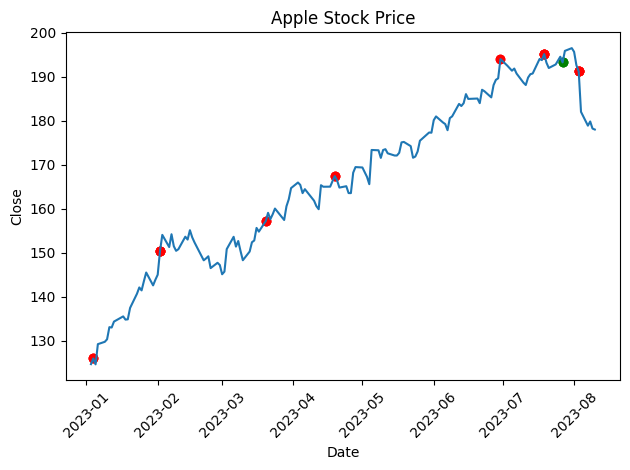

In [129]:
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Apple Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()

print(len(pos_date))
print(len(neg_date))
print(len(neg_price))
plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

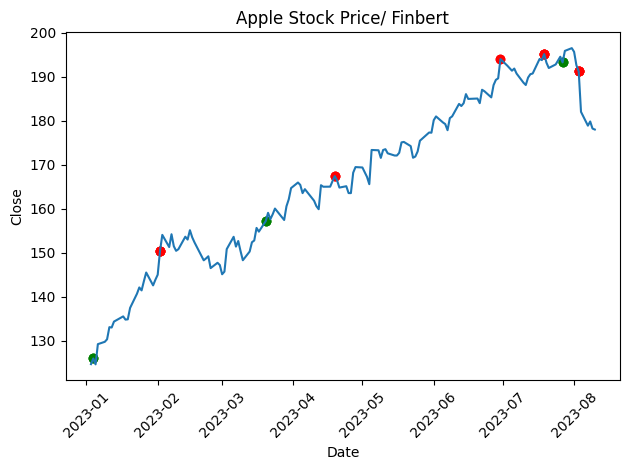

In [110]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("apple", "AAPL", finbert = True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Apple Stock Price/ Finbert')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

# Amazon

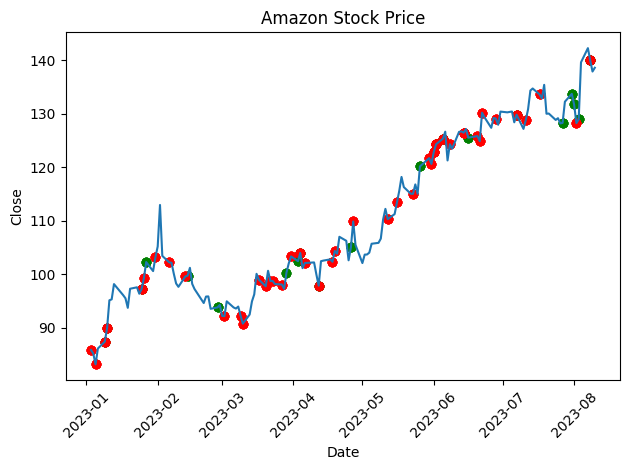

In [111]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("amazon", "AMZN")
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Amazon Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()


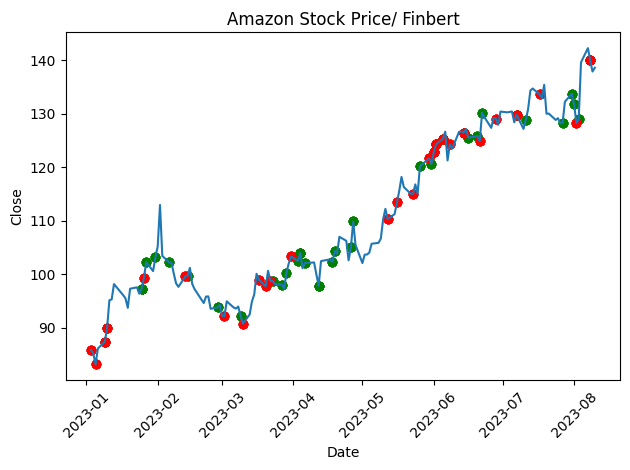

In [112]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("amazon", "AMZN", finbert = True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Amazon Stock Price/ Finbert')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

# Tesla

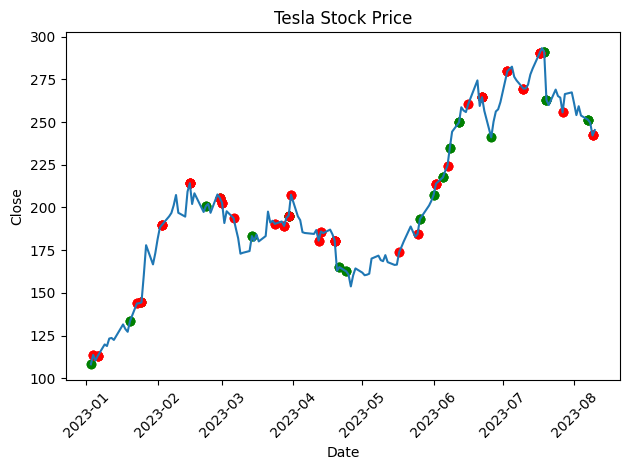

In [113]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("tesla", "TSLA")
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Tesla Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

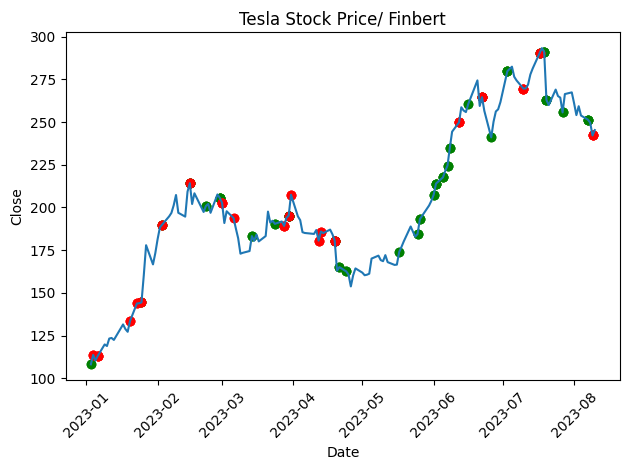

In [114]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("tesla", "TSLA", finbert=True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Tesla Stock Price/ Finbert')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

# Microsoft

8
23
8
23


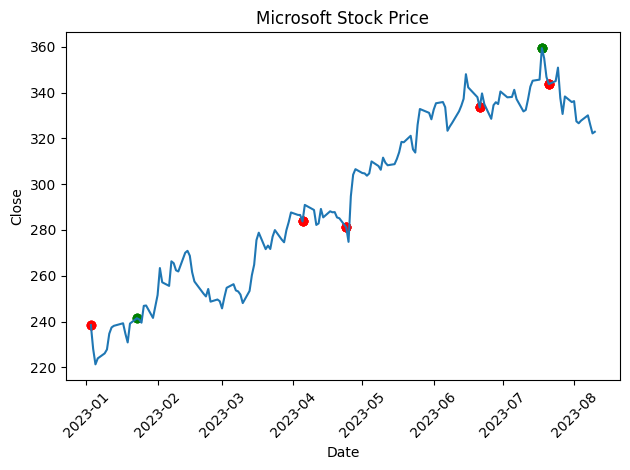

In [130]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("microsoft", "MSFT")
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Microsoft Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()


plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

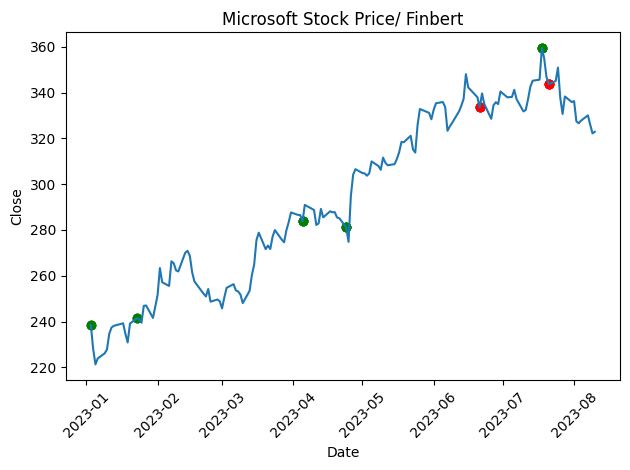

In [116]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("microsoft", "MSFT", finbert=True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Microsoft Stock Price/ Finbert')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

# Google

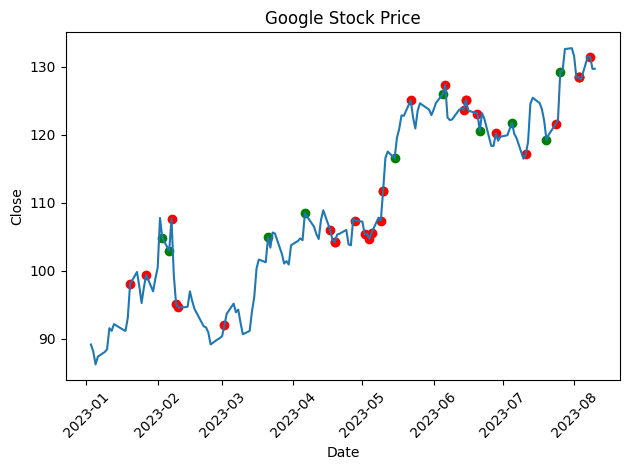

In [117]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("google", "GOOGL")
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Google Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()

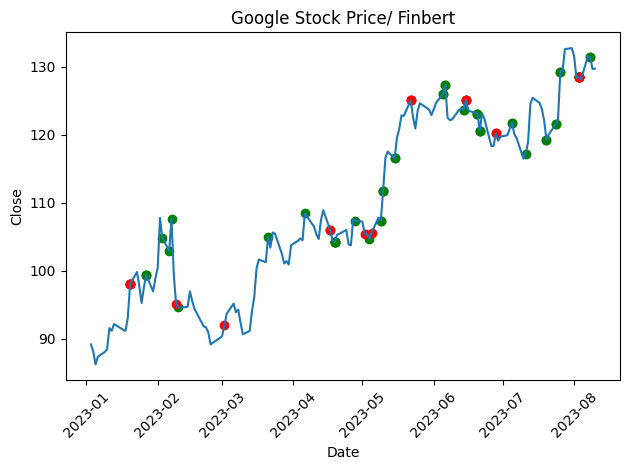

In [118]:
neg_price, neg_date, pos_price, pos_date, df = handle_dfs("google", "GOOGL", finbert=True)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Google Stock Price/ Finbert' )
plt.xticks(rotation=45)
plt.tight_layout()

plt.scatter(pos_date, pos_price, color='green', label='Good News')
plt.scatter(neg_date, neg_price, color='red', label='Bad News')
plt.show()